### Finite Elements
#### Rex McArthur

In [1]:
from __future__ import division, print_function
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
%matplotlib inline

In [3]:
def a_phi(i,j,h,eps):
    if j == i+1:
        return eps/h[i+1] + .5
    elif j==i:
        return -eps/h[i] -eps/h[i+1]
    elif j == i-1:
        return eps/h[i] - .5
    else:
        return 0
    


In [4]:
def l_phi(h):
    return -.5 * (h + np.roll(h,-1))

In [30]:
def prob_1(x,alpha=2,beta=4,eps=.02):
    k_act = alpha + x + (beta - alpha - 1)*((np.e**(x/eps)-1)/(np.e**(1/eps)-1))
    N = len(x)
    h = x - np.roll(x,1)
    diag = -eps/h - eps/np.roll(h,-1)
    diag[0], diag[-1] = 1,1
    upper = eps/h - .5
    upper[1] = 0
    lower = eps/np.roll(h,-1) + .5
    lower[-2]=0
    A = spdiags(np.row_stack((upper,diag,lower)), [1,0,-1], N, N)
    phi = l_phi(h)
    phi[0] = alpha
    phi[-1] = beta
    return spsolve(A,phi), k_act
    

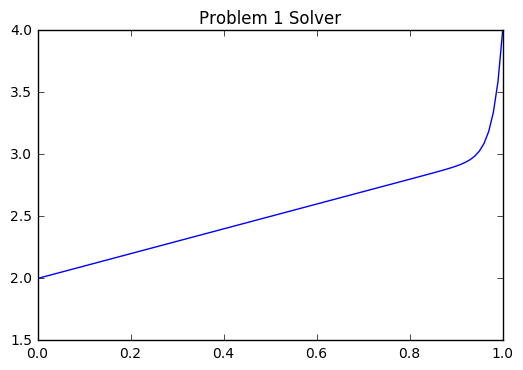

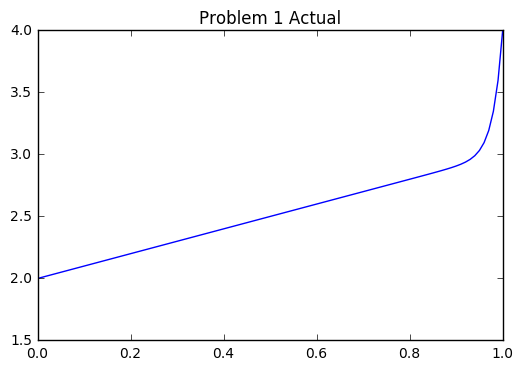

In [35]:
x = np.linspace(0,1,101)
y_est, y_act = prob_1(x)
plt.plot(x,y_est)
plt.title('Problem 1 Solver')
plt.ylim(1.5,4)
plt.show()
plt.plot(x,y_act)
plt.title('Problem 1 Actual')
plt.ylim(1.5,4)
plt.show()

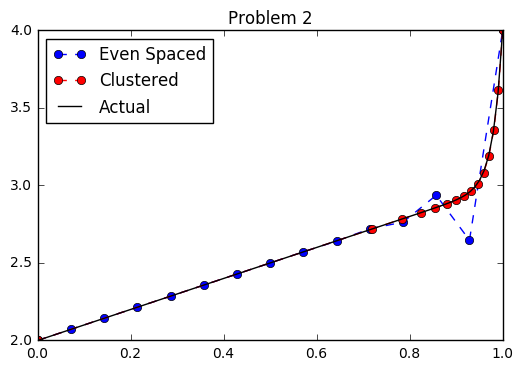

In [46]:
def prob_2():
    even_grid = np.linspace(0,1,15)
    clustered_grid = np.linspace(0,1,15)**(1/8)
    even_est, x = prob_1(even_grid,eps=.02)
    clust_est, x= prob_1(clustered_grid,eps=.02)
    act_grid = np.linspace(0,1,101)
    est, act_sol = prob_1(act_grid, eps=.02)
    plt.plot(even_grid, even_est, 'b--o')
    plt.plot(clustered_grid, clust_est, 'r--o')
    plt.plot(act_grid, act_sol, 'k')
    plt.legend(['Even Spaced','Clustered', 'Actual'], loc='best')
    plt.title("Problem 2")
    plt.plot()
    plt.show()
prob_2()

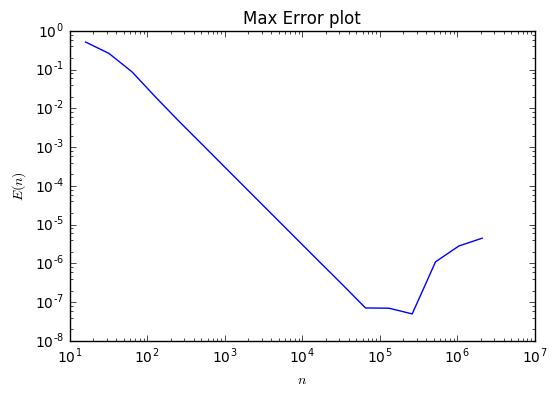

In [55]:
def prob_3():
    i = 2**np.arange(4,22)
    max_error = []
    for k in i:
        x = np.linspace(0,1,k+1)
        est, act = prob_1(x, eps=.01)
        max_error.append(np.max(np.abs(est-act)))
    plt.loglog(i, max_error, basey=10, basex=10)
    plt.title("Max Error plot")
    plt.ylabel('$E(n)$')
    plt.xlabel('$n$')
    plt.show()
prob_3()